In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Q1 
##### Consider the following data frame containing a family name, gender of the family member and her/his monthly income in each record. Name Gender MonthlyIncome (Rs.) Shah Male 114000.00 ..................................
##### Write a program in Python using Pandas to perform the following:

In [53]:
# dataframe creation
df = pd.DataFrame({ 'Name': ['Shah','Vats','Vats','Kumar','Vats','Kumar','Shah','Shah','Kumar','Vats'],
'Gender':['Male','Male','Female','Female','Female','Male','Male','Female','Female','Male'],
'MonthlyIncome(Rs.)':[114000,65000,43150,69500,155000,103000,55000,112400,81030,71900]})

df

,Name,Gender,MonthlyIncome(Rs.)
0,Shah,Male,114000
1,Vats,Male,65000
2,Vats,Female,43150
3,Kumar,Female,69500
4,Vats,Female,155000
5,Kumar,Male,103000
6,Shah,Male,55000
7,Shah,Female,112400
8,Kumar,Female,81030
9,Vats,Male,71900


#### (A) Calculate and display familywise (on family name) gross monthly income.


In [54]:
''' 
(A)
''' 
print('Family wise gross monthly inome :: ')
df.groupby('Name').sum()['MonthlyIncome(Rs.)']

Family wise gross monthly inome :: 


Name
Kumar    253530
Shah     281400
Vats     335050
Name: MonthlyIncome(Rs.), dtype: int64

#### (B) Calculate and display the member with the highest monthly income in a family.

In [55]:
''' 
(B)
''' 
print('Member with the highest monthly income in a family :: ')
df.groupby('Name').max().sort_values(by='MonthlyIncome(Rs.)')

Member with the highest monthly income in a family :: 


,Gender,MonthlyIncome(Rs.)
Name,,
Kumar,Male,103000
Shah,Male,114000
Vats,Male,155000


#### (C) Calculate and display monthly income of all members with income greater than Rs.60000.00

In [56]:
''' 
(C)
''' 
print('Members with monthly income greater than Rs60000.00 :: ')
df[df['MonthlyIncome(Rs.)'] > 60000]

Members with monthly income greater than Rs60000.00 :: 


,Name,Gender,MonthlyIncome(Rs.)
0,Shah,Male,114000
1,Vats,Male,65000
3,Kumar,Female,69500
4,Vats,Female,155000
5,Kumar,Male,103000
7,Shah,Female,112400
8,Kumar,Female,81030
9,Vats,Male,71900


#### (D) Calculate and display the average monthly income of the female members in the Shah family.

In [57]:
''' 
(D)
''' 

salary = df[(df['Name']=='Shah') & (df['Gender']=='Female')]['MonthlyIncome(Rs.)'].mean()
print('Average monthly income of the female members in the Shah family :: ',salary,'rupees')

Average monthly income of the female members in the Shah family ::  112400.0 rupees


#### (E) Find the family name in which females average income is maximum

In [58]:
''' 
(E)
''' 

print('Family name in which females average income is maximum :: ')
tmp_df = df.groupby(['Name','Gender'],as_index=False).mean()    #group on Name and Gender   
tmp_df[tmp_df['Gender'] == 'Female'].max()      #extract mean of females salary from each family and
                                                #then family name in which females mean salary is maximum

Family name in which females average income is maximum :: 


Name                      Vats
Gender                  Female
MonthlyIncome(Rs.)    112400.0
dtype: object

#### (F) Compare member count and average income for each family using appropriate plot

Name,Kumar,Shah,Vats
NumOfMembers,3.0,3.0,4.0
AVG Income,84510.0,93800.0,83762.5


NORMALIZED DATA :: 


Name,Kumar,Shah,Vats
NumOfMembers,0.300000,0.300000,0.400000
AVG Income,0.322468,0.357916,0.319616


<AxesSubplot: xlabel='Family_Name', ylabel='Number'>

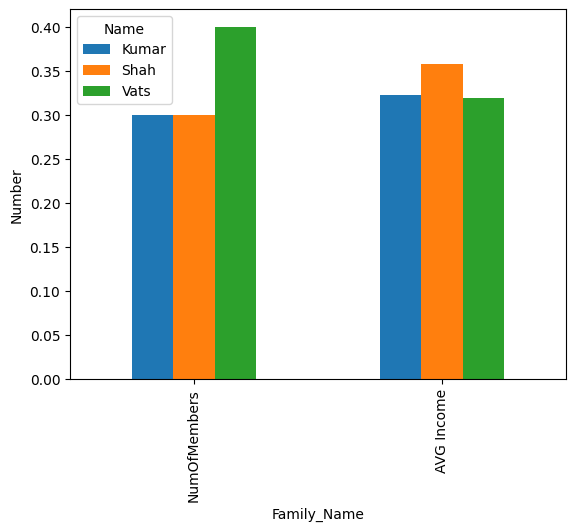

In [52]:
''' 
(F)
''' 
# calculate member count and average income for each family
tmp_df = df.drop('Gender',axis=1).groupby('Name').agg([('NumOfMembers','count'),('AVG Income','mean')]).droplevel(0,axis='columns')
tmp_df = tmp_df.T   #transpose data so that data of all families can be plotted together
display(tmp_df)
# normalize data so that each row sums to 1 
tmp_df = tmp_df.div(tmp_df.sum(1),axis=0)
print('NORMALIZED DATA :: ')
display(tmp_df)
tmp_df.plot(kind = 'bar',xlabel='Family_Name',ylabel='Number')

#### (G) Draw a pie chart for each family to show their income distribution gender wise

,Name,Gender,MonthlyIncome(Rs.)
0,Kumar,Female,150530
1,Kumar,Male,103000
2,Shah,Female,112400
3,Shah,Male,169000
4,Vats,Female,198150
5,Vats,Male,136900


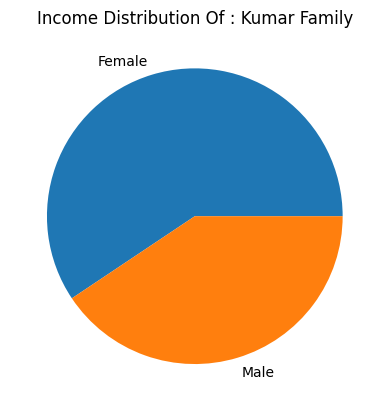

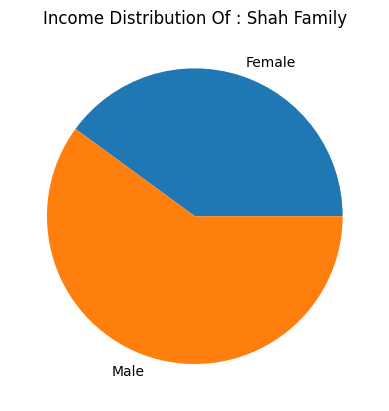

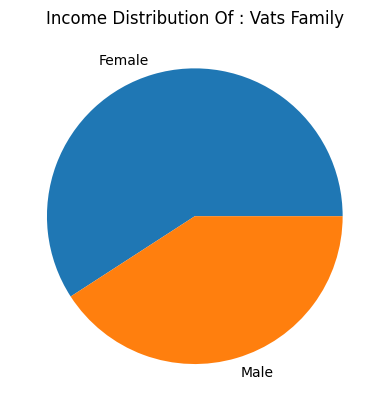

In [59]:
''' 
(G)
'''

tmp_df = df.groupby(['Name','Gender'],as_index=False).sum()
display(tmp_df)

tmp_df = tmp_df.groupby('Name')
for key,data in tmp_df:
    new_df = data.drop('Name',axis=1).set_index('Gender') #drop Name column and set Gender col as index
    #creating a series containing income of male and female member
    tmp_series = pd.Series(new_df.values.flatten(),index=new_df.index)
    #plotting pie chart
    fig = plt.figure()
    plt.pie(tmp_series,labels=tmp_series.index)
    plt.title('Income Distribution Of : '+key+' Family')
    

# Q2
### Use tips data to do the following: see appropriate parameters for figs/plots.

In [61]:
import seaborn as sns

# importing tips dataframe
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### (A) Compare average tips paid by smoker and non-smokers on weekdays and weekends individually using bar plot

,Smoker,Non_Smoker
tip_weekdays,2.881875,2.685102
tip_weekends,3.075246,3.139216


Text(0.5, 1.0, 'Average tips paid by smoker and non-smokers on weekdays and weekends')

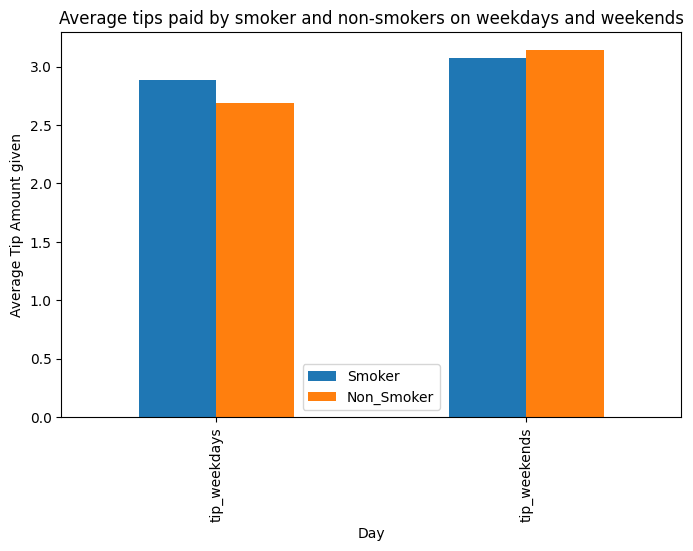

In [62]:
''' 
(A)
''' 

#average tips paid on weekdays
tmp_df = df[(df['day'] != 'Sat') & (df['day'] != 'Sun')].groupby('smoker')
tmp_df1 = tmp_df.mean()

#average tips paid on weekends
tmp_df2 = df[(df['day'] == 'Sat') | (df['day'] == 'Sun')].groupby('smoker')
tmp_df2 = tmp_df2.mean()

# merge both the dataframes on the basis of indices
tmp_df = tmp_df1.merge(tmp_df2,left_index=True,right_index=True,suffixes=['_weekdays','_weekends'])
tmp_df = tmp_df[['tip_weekdays','tip_weekends']]   #extract tips columns
tmp_df.index = ['Smoker','Non_Smoker']   #change index labels 
display(tmp_df.T)

# bar plot
tmp_df.T.plot(kind = 'bar',xlabel = 'Day',ylabel = 'Average Tip Amount given',figsize=(8,5))
plt.title('Average tips paid by smoker and non-smokers on weekdays and weekends')

#### (B) compare the distribution of bill amount of bills paid on weekday and week end.

<AxesSubplot: title={'center': 'Distribution of bills amount paid on weekday and week end'}, xlabel='Days', ylabel='Total Bill Amount'>

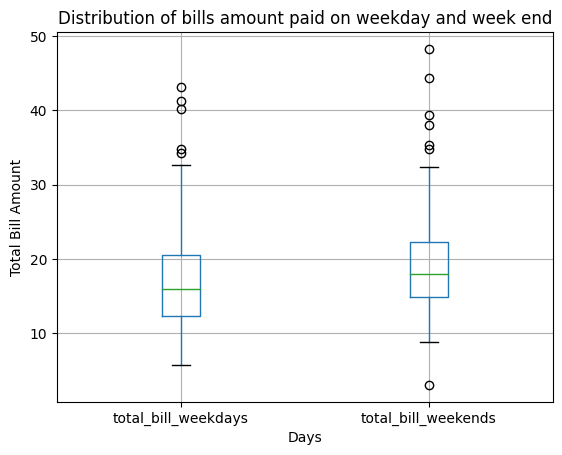

In [63]:
''' 
(B)
''' 

fig = plt.figure()

#Bills paid on weekdays
tmp_df1 = df[(df['day'] != 'Sat') & (df['day'] != 'Sun')][['total_bill']].reset_index(drop = True)

#Bills paid on weekends
tmp_df2 = df[(df['day'] == 'Sat') | (df['day'] == 'Sun')][['total_bill']].reset_index(drop = True)

# merge tmp_df1 and tmp_df2
tmp_df = tmp_df1.merge(tmp_df2,left_index=True,right_index=True,suffixes=['_weekdays','_weekends'])
plt.xlabel('Days')
plt.ylabel('Total Bill Amount')
plt.title('Distribution of bills amount paid on weekday and week end')

tmp_df.boxplot()

#### (C) Identify outlier in the bill amount of females customers (explicitly mention the formula used to detect outliers) and show using appropriate plot

outliers :: 
11     35.26
52     34.81
85     34.83
102    44.30
197    43.11
238    35.83
Name: total_bill, dtype: float64


Text(0.5, 1.0, 'Bill amount of females customers')

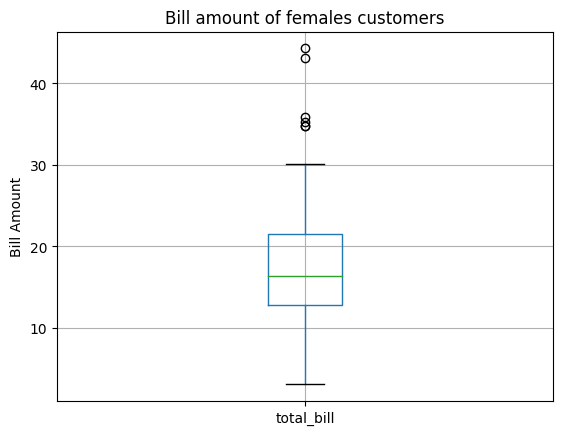

In [64]:
''' 
(C)
''' 
# extract data of females only
tmp_df = df[df['sex']=='Female']

# calculate inter quartile range
Q1 = tmp_df['total_bill'].quantile(0.25)
Q3 = tmp_df['total_bill'].quantile(0.75)

IQR = Q3-Q1
minVal = Q1 - 1.5*IQR
maxVal = Q3 + 1.5*IQR 

# store values which are less than minVal and greater than the maxVal
tmp_df = tmp_df[['total_bill']]
outliers = tmp_df[(tmp_df['total_bill'] < minVal) | (tmp_df['total_bill'] > maxVal)]['total_bill']

# display outliers
print('outliers :: ')
if len(outliers) == 0:
    print('Nan')
else :
    print(outliers)

# show outliers using box plot
tmp_df.boxplot()
plt.ylabel('Bill Amount')
plt.title('Bill amount of females customers')

#### (D) Find the size of customers who have paid maximum tip on weekend.

In [65]:
''' 
(D)
''' 
# extract weekend data 
tmp_df = df[(df['day'] == 'Sun') | (df['day'] == 'Sat')]
# find max tip paid 
tmp_df = tmp_df[tmp_df['total_bill'] == tmp_df['total_bill'].max()]['size']
print('Size of customers who have paid maximum tip on weekend :: ',tmp_df.values)


Size of customers who have paid maximum tip on weekend ::  [3]


#### (E) Compare the average amount of bill paid by females and males customers on all days (using line plot, xaxis has four tics corresponding to day)

total_bill           
sex        Male     Female
day                       
Thur  18.714667  16.715312
Fri   19.857000  14.145556
Sat   20.802542  19.680357
Sun   21.887241  19.872222

Text(0.5, 1.0, 'Average amount of bill paid by females and males customers on all day')

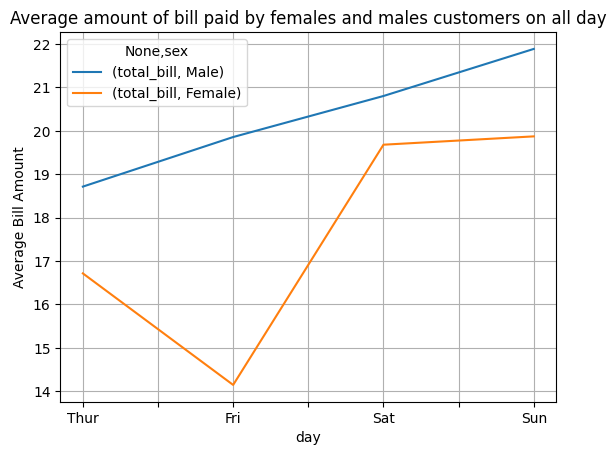

In [66]:
''' 
(E)
''' 
# group by tips data on the basis of sex and day, then calulate average bill paid on each day
tmp_df = df.groupby(['sex','day'])[['total_bill']].mean()
tmp_df = tmp_df.unstack(level=0)
display(tmp_df)

# plot
tmp_df.plot(ylabel = 'Average Bill Amount')
plt.grid()
plt.title('Average amount of bill paid by females and males customers on all day')